In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

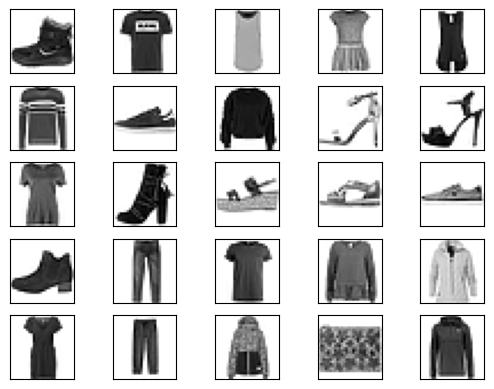

In [3]:
class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary)
plt.show()

In [4]:
x_train, X_test = x_train / 255.0, x_test / 255.0

model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(28,28)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test, verbose=2)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 566us/step - accuracy: 0.7634 - loss: 0.6730
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 553us/step - accuracy: 0.8558 - loss: 0.4015
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 556us/step - accuracy: 0.8645 - loss: 0.3717
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 560us/step - accuracy: 0.8739 - loss: 0.3462
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 554us/step - accuracy: 0.8785 - loss: 0.3326
313/313 - 0s - 373us/step - accuracy: 0.8572 - loss: 55.5339


[55.533912658691406, 0.857200026512146]

In [5]:
x_train_final = x_train.reshape((-1, 28, 28, 1))
x_test_final = x_test.reshape((-1, 28, 28, 1))

In [6]:
model_with_conv = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(28,28,1)),
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2), strides=2),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_with_conv.compile(optimizer='adam',
                        loss='sparse_categorical_crossentropy',
                        metrics=['accuracy'])

In [7]:
model_with_conv.fit(x_train_final, y_train, epochs=5)
model_with_conv.evaluate(x_test_final, y_test, verbose=2)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7963 - loss: 0.5640
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.8995 - loss: 0.2740
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9179 - loss: 0.2246
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9315 - loss: 0.1861
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.9415 - loss: 0.1594
313/313 - 1s - 3ms/step - accuracy: 0.8917 - loss: 37.2362


[37.23617935180664, 0.891700029373169]

In [7]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalMaxPool2D, GlobalAveragePooling2D
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [17]:
model = ResNet50(
    include_top=True,
    weights='imagenet',
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000
)

In [18]:
model.trainable = False
model = Sequential(
    [model,
     Dense(2, activation='sigmoid')]
)

In [19]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ ?                      │    25,636,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,636,712 (97.80 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 25,636,712 (97.80 MB)

In [21]:
BATCH_SIZE = 32
image_height = 224
image_width = 224
train_dir = "080263/chap5/data/catanddog/train"
valid_dir = "080263/chap5/data/catanddog/validation"

train = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1
)

train_generator = train.flow_from_directory(
    train_dir,
    target_size=(image_height, image_width),
    color_mode='rgb',
    batch_size=BATCH_SIZE,
    seed=1,
    shuffle=True,
    class_mode='categorical'
)

valid = ImageDataGenerator(rescale=1.0/255.0)
valid_generator = valid.flow_from_directory(
    valid_dir,
    target_size=(image_height, image_width),
    color_mode='rgb',
    batch_size=BATCH_SIZE,
    seed=7,
    shuffle=True,
    class_mode='categorical'
)

history = model.fit(train_generator,
                    epochs=20,
                    validation_data=valid_generator,
                    verbose=2)

Found 385 images belonging to 2 classes.


Found 98 images belonging to 2 classes.
Epoch 1/20


/opt/miniconda3/envs/py311/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


13/13 - 16s - 1s/step - accuracy: 0.5247 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 2/20
13/13 - 13s - 1s/step - accuracy: 0.5273 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 3/20
13/13 - 13s - 1s/step - accuracy: 0.5273 - loss: 0.6930 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 4/20
13/13 - 13s - 994ms/step - accuracy: 0.5273 - loss: 0.6930 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 5/20
13/13 - 13s - 1s/step - accuracy: 0.5273 - loss: 0.6927 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 6/20
13/13 - 13s - 1s/step - accuracy: 0.5273 - loss: 0.6926 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 7/20
13/13 - 13s - 1s/step - accuracy: 0.5273 - loss: 0.6925 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 8/20
13/13 - 13s - 998ms/step - accuracy: 0.5273 - loss: 0.6925 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 9/20
13/13 - 14s - 1s/step - accuracy: 0.5273 - loss: 0.6924 - val_accuracy: 0.5000 - val_loss: 0.6933
Epoch 10/20
13/13 - 14s 

Text(0.5, 1.0, '오차')

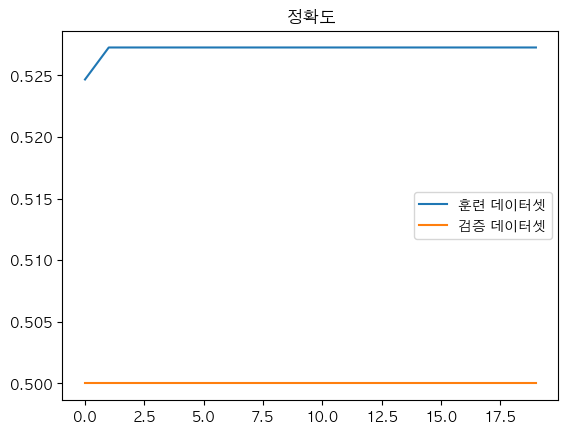

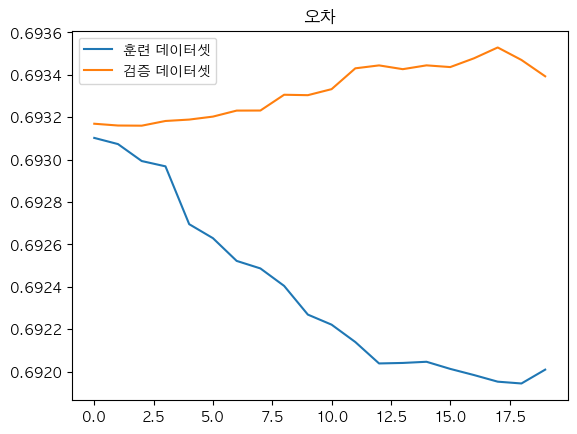

In [22]:
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.rc('font', family='AppleGothic') 

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy))

plt.plot(epochs, accuracy, label="훈련 데이터셋")
plt.plot(epochs, val_accuracy, label="검증 데이터셋")
plt.legend()
plt.title('정확도')
plt.figure()

plt.plot(epochs, loss, label="훈련 데이터셋")
plt.plot(epochs, val_loss, label="검증 데이터셋")
plt.legend()
plt.title('오차')

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 858ms/step


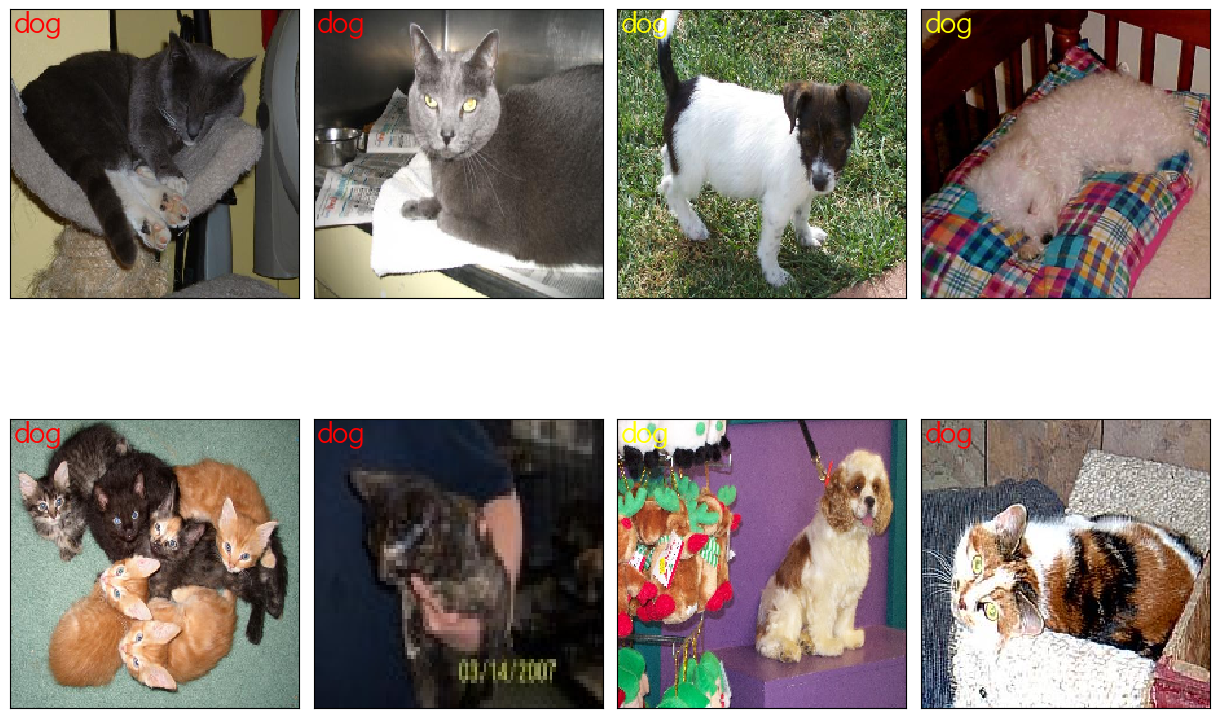

In [32]:
class_names = ['cat', 'dog']
validation, label_batch = next(iter(valid_generator))
prediction_values = model.predict(validation)
prediction_values = np.argmax(prediction_values, axis=1)

fig = plt.figure(figsize=(12,8))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(8):
    ax = fig.add_subplot(2, 4, i+1, xticks=[], yticks=[])
    ax.imshow(validation[i, :], cmap=plt.cm.gray_r, interpolation='nearest')
    if prediction_values[i] == np.argmax(label_batch[i]):
        ax.text(3, 17, class_names[prediction_values[i]], color='yellow', fontsize=20)
    else:
        ax.text(3, 17, class_names[prediction_values[i]], color='red', fontsize=20)

In [16]:
import tensorflow as tf
import tensorflow_hub as hub

class instance2layer(tf.keras.layers.Layer):
    def __init__(self, hub_layer):
        super(instance2layer, self).__init__()
        self.hub_layer = hub_layer

    def call(self, inputs):
        return self.hub_layer(inputs)

model = tf.keras.models.Sequential()
hub_layer = hub.KerasLayer(
    "https://tfhub.dev/google/imagenet/resnet_v2_152/feature_vector/4",
    input_shape=(224,224,3),
    trainable=False
)

model.add(instance2layer(hub_layer))
model.add(Dense(2, activation='sigmoid'))

In [18]:
BATCH_SIZE = 32
image_height = 224
image_width = 224
train_dir = "080263/chap5/data/catanddog/train"
valid_dir = "080263/chap5/data/catanddog/validation"

train = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1
)

train_generator = train.flow_from_directory(
    train_dir,
    target_size=(image_height, image_width),
    color_mode='rgb',
    batch_size=BATCH_SIZE,
    seed=1,
    shuffle=True,
    class_mode='categorical'
)

valid = ImageDataGenerator(rescale=1.0/255.0)
valid_generator = valid.flow_from_directory(
    valid_dir,
    target_size=(image_height, image_width),
    color_mode='rgb',
    batch_size=BATCH_SIZE,
    seed=7,
    shuffle=True,
    class_mode='categorical'
)

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(train_generator,
                    epochs=20,
                    validation_data=valid_generator,
                    verbose=2)

Found 385 images belonging to 2 classes.


Found 98 images belonging to 2 classes.
Epoch 1/20


/opt/miniconda3/envs/py311/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


13/13 - 37s - 3s/step - accuracy: 0.8104 - loss: 0.4792 - val_accuracy: 0.9490 - val_loss: 0.1863
Epoch 2/20
13/13 - 33s - 3s/step - accuracy: 0.9662 - loss: 0.1285 - val_accuracy: 0.9796 - val_loss: 0.0911
Epoch 3/20
13/13 - 32s - 2s/step - accuracy: 0.9896 - loss: 0.0686 - val_accuracy: 0.9694 - val_loss: 0.0815
Epoch 4/20
13/13 - 32s - 2s/step - accuracy: 0.9844 - loss: 0.0557 - val_accuracy: 0.9796 - val_loss: 0.0630
Epoch 5/20
13/13 - 32s - 2s/step - accuracy: 0.9922 - loss: 0.0391 - val_accuracy: 0.9796 - val_loss: 0.0551
Epoch 6/20
13/13 - 32s - 2s/step - accuracy: 1.0000 - loss: 0.0270 - val_accuracy: 0.9796 - val_loss: 0.0537
Epoch 7/20
13/13 - 32s - 2s/step - accuracy: 0.9896 - loss: 0.0341 - val_accuracy: 0.9796 - val_loss: 0.0558
Epoch 8/20
13/13 - 31s - 2s/step - accuracy: 0.9896 - loss: 0.0389 - val_accuracy: 0.9796 - val_loss: 0.0503
Epoch 9/20
13/13 - 31s - 2s/step - accuracy: 0.9974 - loss: 0.0253 - val_accuracy: 0.9898 - val_loss: 0.0460
Epoch 10/20
13/13 - 31s - 2s/s

Text(0.5, 1.0, '오차')

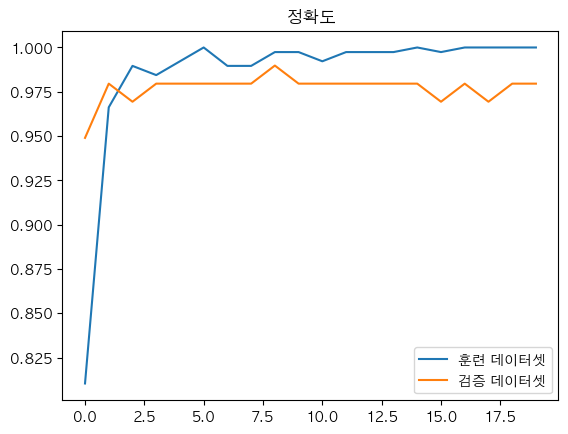

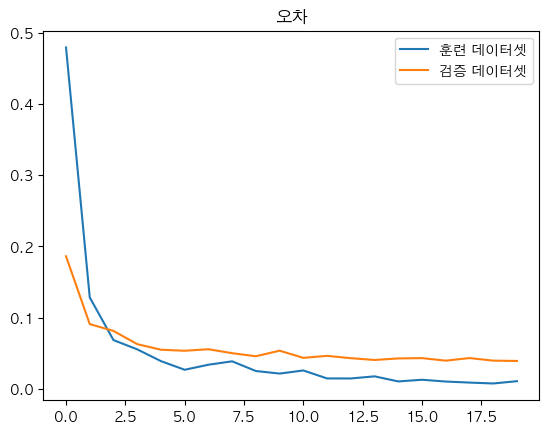

In [19]:
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.rc('font', family='AppleGothic') 

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy))

plt.plot(epochs, accuracy, label="훈련 데이터셋")
plt.plot(epochs, val_accuracy, label="검증 데이터셋")
plt.legend()
plt.title('정확도')
plt.figure()

plt.plot(epochs, loss, label="훈련 데이터셋")
plt.plot(epochs, val_loss, label="검증 데이터셋")
plt.legend()
plt.title('오차')

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


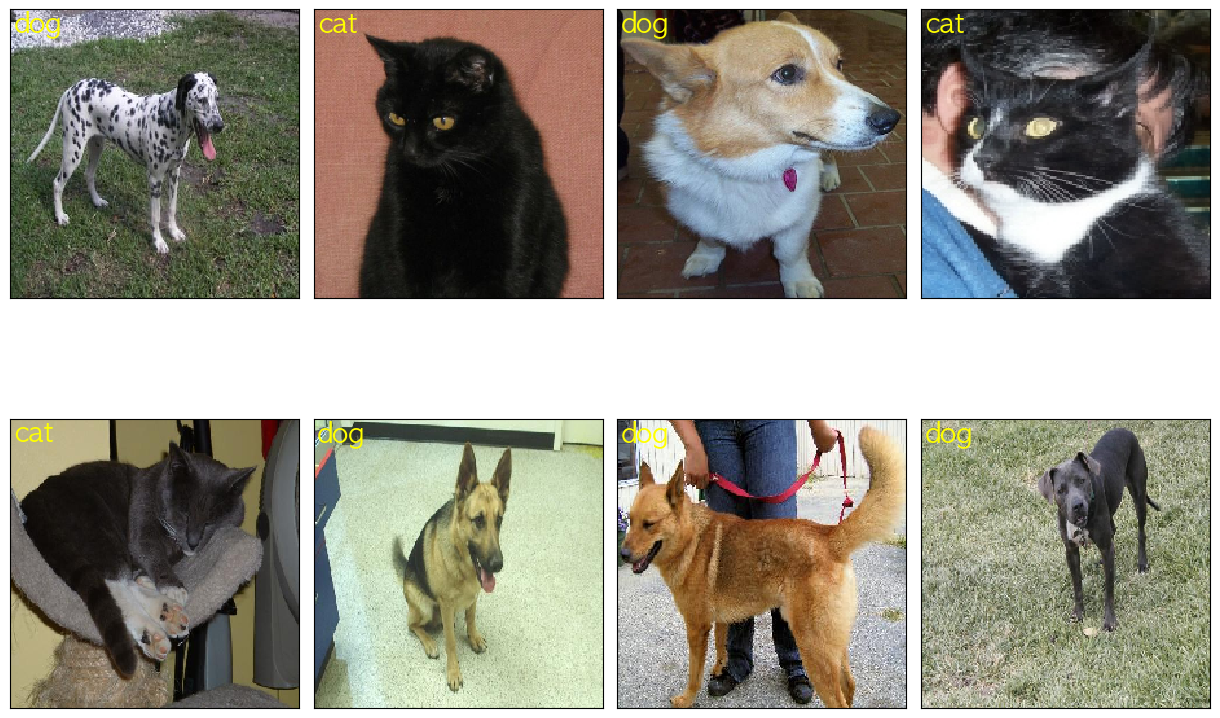

In [20]:
class_names = ['cat', 'dog']
validation, label_batch = next(iter(valid_generator))
prediction_values = model.predict(validation)
prediction_values = np.argmax(prediction_values, axis=1)

fig = plt.figure(figsize=(12,8))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(8):
    ax = fig.add_subplot(2, 4, i+1, xticks=[], yticks=[])
    ax.imshow(validation[i, :], cmap=plt.cm.gray_r, interpolation='nearest')
    if prediction_values[i] == np.argmax(label_batch[i]):
        ax.text(3, 17, class_names[prediction_values[i]], color='yellow', fontsize=20)
    else:
        ax.text(3, 17, class_names[prediction_values[i]], color='red', fontsize=20)

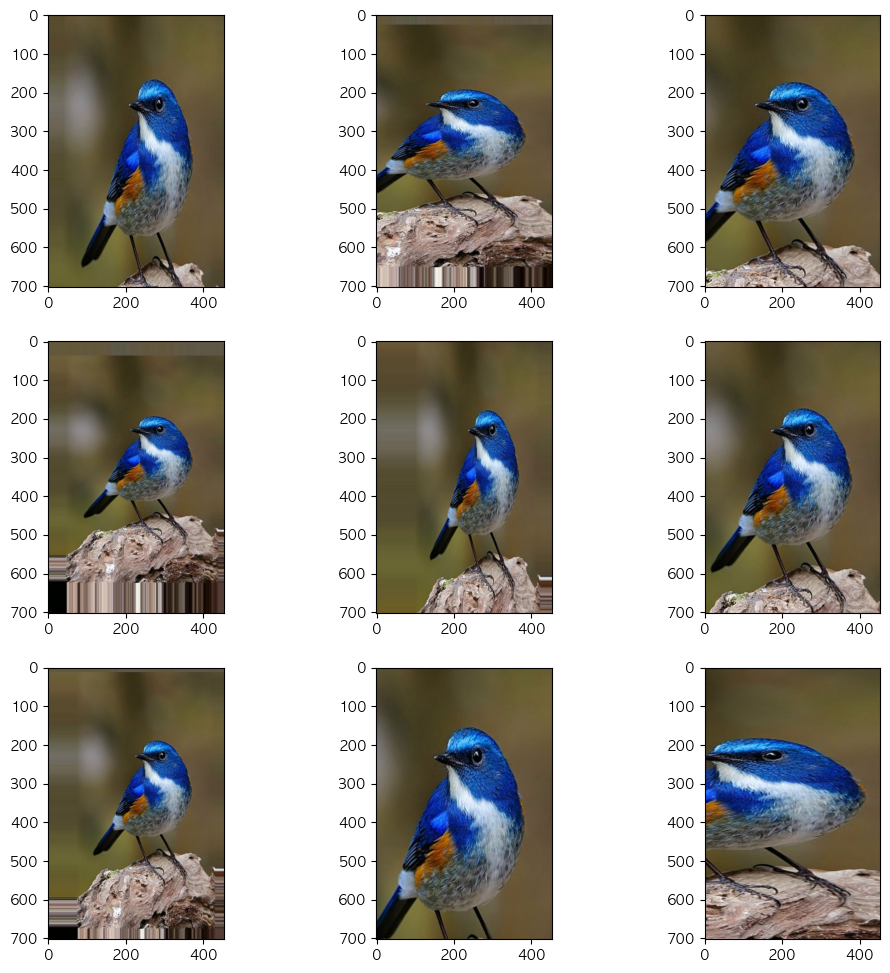

In [47]:
# Note: Image Augmentation

from numpy import expand_dims
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
from matplotlib import pyplot as plt

img = load_img('080263/chap5/data/bird.jpg')
data = img_to_array(img)

img_data = expand_dims(data, 0)

modes = ['width', 'height', 'flip', 'rotate', 'brightness', 'zoom']
mode = modes[5]

if mode == 'width':
    data_gen = ImageDataGenerator(width_shift_range=0.5)
elif mode == 'height':
    data_gen = ImageDataGenerator(height_shift_range=0.5)
elif mode == 'flip':
    data_gen = ImageDataGenerator(horizontal_flip=True, vertical_flip=True)
elif mode == 'rotate':
    data_gen = ImageDataGenerator(rotation_range=90)
elif mode == 'brightness':
    data_gen = ImageDataGenerator(brightness_range=[0.3, 1.2])
elif mode == 'zoom':
    data_gen = ImageDataGenerator(zoom_range=[0.4, 1.5])

data_iter = data_gen.flow(img_data, batch_size=1)
fig = plt.figure(figsize=(12,12))
for i in range(9):
    plt.subplot(3, 3, i+1)
    batch = next(data_iter)
    image = batch[0].astype('uint16')
    plt.imshow(image)
plt.show()

In [54]:
# 설명 가능한 CNN

import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [68]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(input_shape=(100,100,3), activation='relu', kernel_size=(5,5), filters=32),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(activation='relu', kernel_size=(5,5), filters=64),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(activation='relu', kernel_size=(5,5), filters=64),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(activation='relu', kernel_size=(5,5), filters=64),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])
model.summary()

/opt/miniconda3/envs/py311/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 96, 96, 32)     │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 48, 48, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 44, 44, 64)     │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 18, 18, 64)     │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 9, 9, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 5, 5, 64)       │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 301,922 (1.15 MB)

 Trainable params: 301,922 (1.15 MB)

 Non-trainable params: 0 (0.00 B)

In [69]:
ins = model.inputs
outs = model.layers[0].output
feature_map = Model(inputs=ins, outputs=outs)
feature_map.summary()

Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 100, 100, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 96, 96, 32)     │         2,432 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,432 (9.50 KB)

 Trainable params: 2,432 (9.50 KB)

 Non-trainable params: 0 (0.00 B)

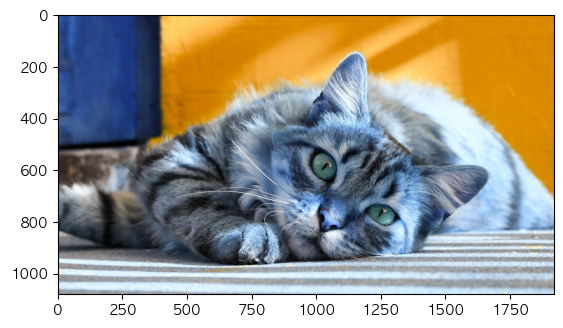

In [70]:
img = cv2.imread("080263/chap5/data/cat.jpg")
plt.imshow(img)

(1, 100, 100, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
(1, 96, 96, 32)


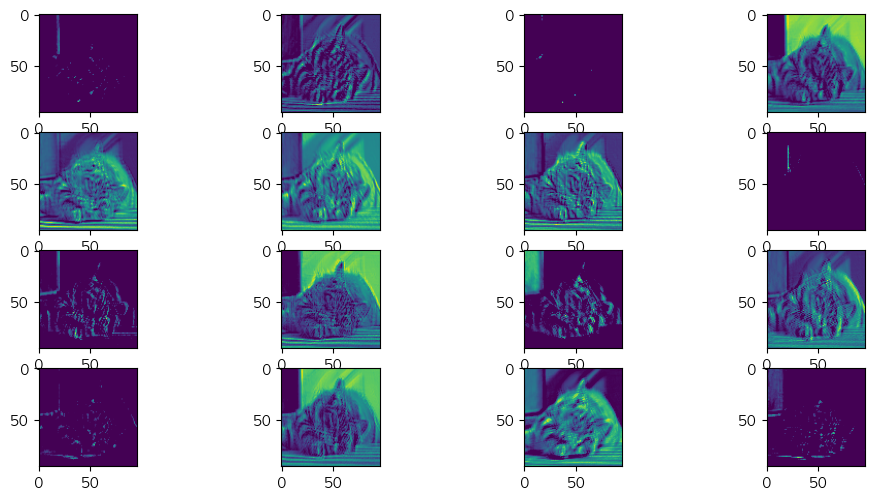

In [71]:
img = cv2.resize(img, (100,100))
input_img = np.expand_dims(img, axis=0)
print(input_img.shape)

feature = feature_map.predict(input_img)
print(feature.shape)
fig = plt.figure(figsize=(12,12))
for i in range(16):
    ax = fig.add_subplot(8, 4, i+1)
    ax.imshow(feature[0,:,:,i])

In [72]:
ins = model.inputs
outs = model.layers[2].output
feature_map = Model(inputs=ins, outputs=outs)
feature_map.summary()

Model: "functional_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 100, 100, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 96, 96, 32)     │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 48, 48, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 44, 44, 64)     │        51,264 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 53,696 (209.75 KB)

 Trainable params: 53,696 (209.75 KB)

 Non-trainable params: 0 (0.00 B)

(1, 100, 100, 3)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
(1, 44, 44, 64)


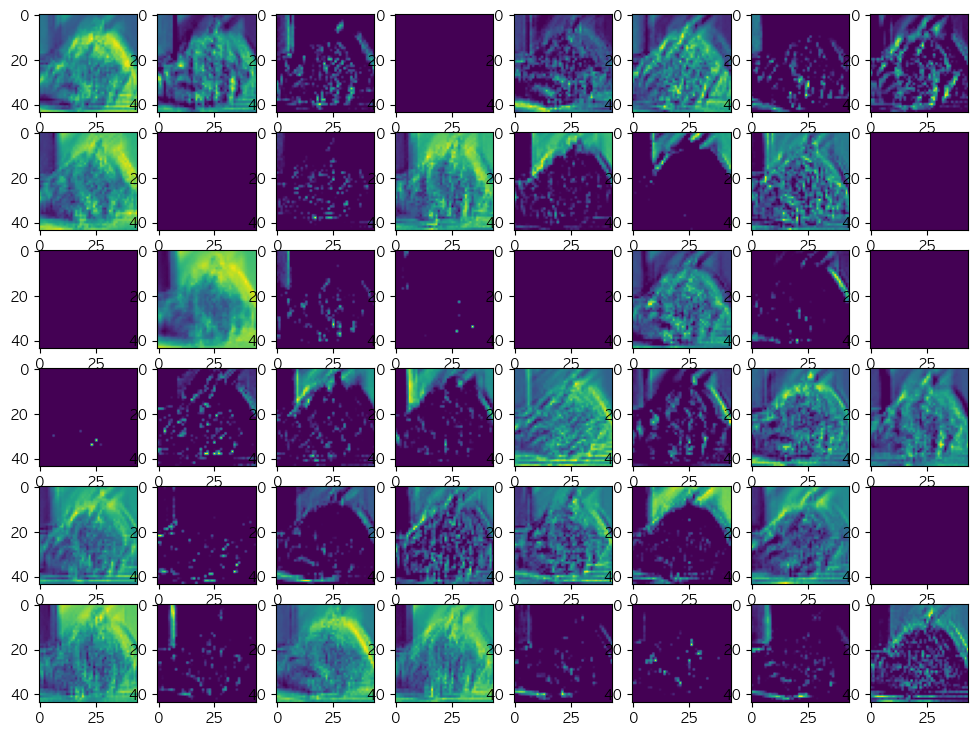

In [73]:
img = cv2.resize(img, (100,100))
input_img = np.expand_dims(img, axis=0)
print(input_img.shape)

feature = feature_map.predict(input_img)
print(feature.shape)
fig = plt.figure(figsize=(12,12))
for i in range(48):
    ax = fig.add_subplot(8, 8, i+1)
    ax.imshow(feature[0,:,:,i])

In [74]:
ins = model.inputs
outs = model.layers[6].output
feature_map = Model(inputs=ins, outputs=outs)
feature_map.summary()

Model: "functional_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 100, 100, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 96, 96, 32)     │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 48, 48, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 44, 44, 64)     │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 18, 18, 64)     │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 9, 9, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 5, 5, 64)       │       102,464 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 258,624 (1010.25 KB)

 Trainable params: 258,624 (1010.25 KB)

 Non-trainable params: 0 (0.00 B)

(1, 100, 100, 3)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
(1, 5, 5, 64)


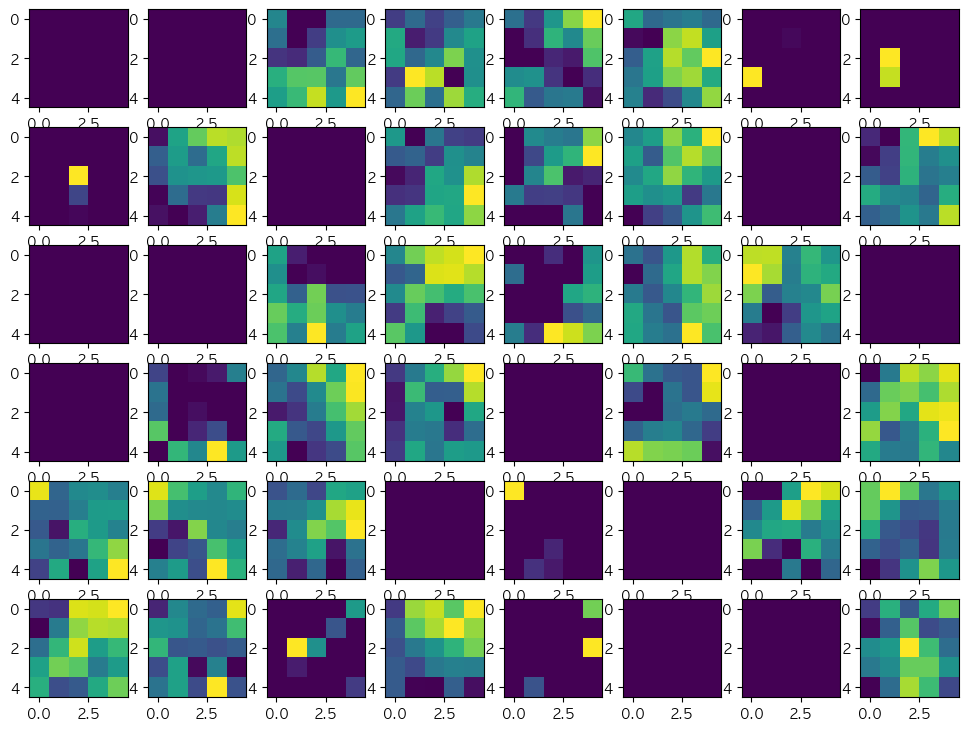

In [75]:
img = cv2.resize(img, (100,100))
input_img = np.expand_dims(img, axis=0)
print(input_img.shape)

feature = feature_map.predict(input_img)
print(feature.shape)
fig = plt.figure(figsize=(12,12))
for i in range(48):
    ax = fig.add_subplot(8, 8, i+1)
    ax.imshow(feature[0,:,:,i])